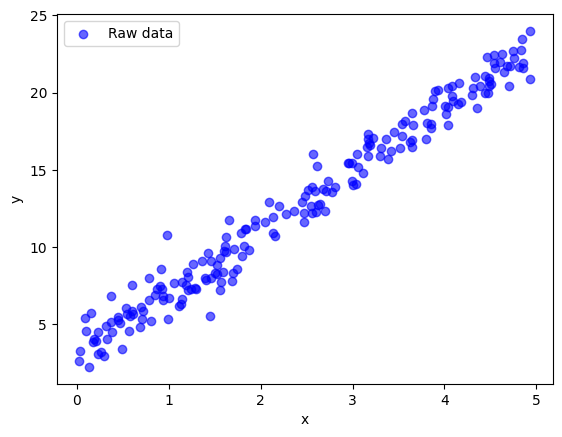

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
m = 200
X = np.random.uniform(0, 5, m)
epsilon = np.random.normal(0, 1, m)  # Gaussian noise
y = 3 + 4 * X + epsilon

# Plot raw data
plt.scatter(X, y, color="blue", alpha=0.6, label="Raw data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Closed-form solution:
Intercept: 3.1052, Slope: 3.9844


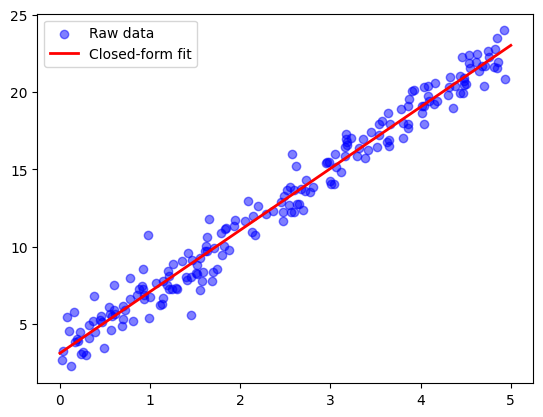

In [2]:
# Add bias term (column of 1s)
X_b = np.c_[np.ones((m, 1)), X]  # shape (m, 2)

# Normal equation solution
theta_closed = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

intercept_closed, slope_closed = theta_closed
print("Closed-form solution:")
print(f"Intercept: {intercept_closed:.4f}, Slope: {slope_closed:.4f}")

# Plot fitted line
x_line = np.linspace(0, 5, 100)
y_line_closed = intercept_closed + slope_closed * x_line
plt.scatter(X, y, color="blue", alpha=0.5, label="Raw data")
plt.plot(x_line, y_line_closed, "r-", linewidth=2, label="Closed-form fit")
plt.legend()
plt.show()

Gradient Descent solution:
Intercept: 3.1052, Slope: 3.9844


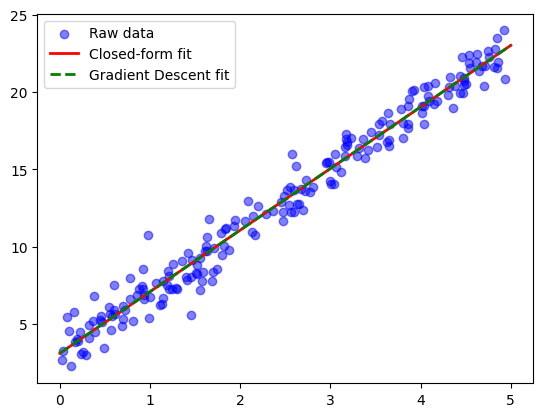

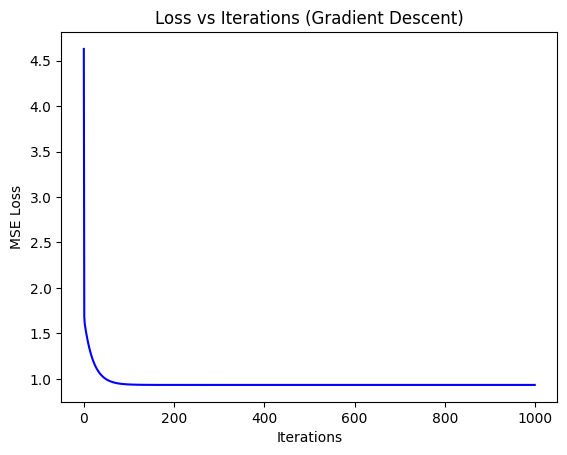

In [3]:
# Gradient Descent
eta = 0.05
n_iterations = 1000
theta = np.zeros(2)
losses = []

for i in range(n_iterations):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    mse = np.mean((X_b.dot(theta) - y)**2)
    losses.append(mse)

intercept_gd, slope_gd = theta
print("Gradient Descent solution:")
print(f"Intercept: {intercept_gd:.4f}, Slope: {slope_gd:.4f}")

# Plot fitted line
y_line_gd = intercept_gd + slope_gd * x_line
plt.scatter(X, y, color="blue", alpha=0.5, label="Raw data")
plt.plot(x_line, y_line_closed, "r-", linewidth=2, label="Closed-form fit")
plt.plot(x_line, y_line_gd, "g--", linewidth=2, label="Gradient Descent fit")
plt.legend()
plt.show()

# Plot loss curve
plt.plot(range(n_iterations), losses, "b-")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Loss vs Iterations (Gradient Descent)")
plt.show()